# Project 8 - Customer Segmentation based on credit card data

# 2/ Clustering 

## Get started

In [36]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

%matplotlib inline

In [2]:
df = pd.read_csv(Path.cwd()/'Processed'/'dataset_cleaned.csv',index_col=0)
df_out = pd.read_csv(Path.cwd()/'Processed'/'dataset_cleaned_no_out.csv',index_col=0)
log_df = pd.read_csv(Path.cwd()/'Processed'/'dataset_cleaned_log.csv',index_col=0)

## Normalization

In [3]:
# Basic dataset
mask = df.columns[1:]
df[mask] = normalize(df[mask])
df =  df.set_index('CUST_ID')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.091790,0.00000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
C10002,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
C10003,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
C10005,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
C10006,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842


In [4]:
# Dataset without outliers
mask = df_out.columns[1:]
df_out[mask] = normalize(df_out[mask])
df_out =  df_out.set_index('CUST_ID')
df_out.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.091790,0.00000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
C10002,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
C10003,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
C10005,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400
C10006,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842


In [5]:
# Log transformed dataset
mask = log_df.columns[1:]
log_df[mask] = normalize(log_df[mask])
log_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,3.711148,-0.015969,0.362733,0.000000,0.362733,0.000000,-0.142589,0.000000,-0.197750,0.000000,0.000000,0.055161,0.549721,0.422356,0.392978,0.000000,0.197750
C10002,8.071677,-0.005641,0.000000,0.000000,0.000000,0.519075,0.000000,0.000000,0.000000,-0.082045,0.082045,0.000000,0.523983,0.492369,0.412953,-0.089015,0.147063
C10003,7.822104,0.000000,0.409856,0.409856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153139,0.549884,0.396455,0.396969,0.000000,0.153139
C10005,6.706513,0.000000,0.221327,0.221327,0.000000,0.000000,-0.198363,-0.198363,0.000000,0.000000,0.000000,0.000000,0.565979,0.520443,0.439081,0.000000,0.198363
C10006,7.500988,0.000000,0.427127,0.000000,0.427127,0.000000,-0.024069,0.000000,-0.031995,0.000000,0.000000,0.123438,0.444944,0.430028,0.462200,0.000000,0.147507


## Find number of clusters

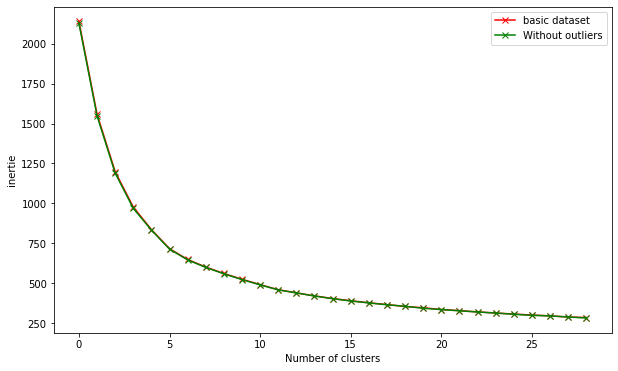

In [6]:
# Elbow plot to find number of clusters 
n_clusters=30
cost=[]
cost2=[]
cost3=[]

for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df)
    cost.append(kmean.inertia_)  

for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(df_out)
    cost2.append(kmean.inertia_) 

plt.figure(figsize=(10,6))
plt.plot(cost, 'bx-',label='basic dataset',color= 'r')
plt.plot(cost2, 'bx-',label='Without outliers',color='g')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('inertie')
plt.show()

<b> From the elbow plot we can see that they are no differences in terms of cost between the dataset with and without outliers. So for the rest of the analysis we will use only the dataset without outliers. </b> The ideal number of clusters for these dataset is about 5 clusters. 

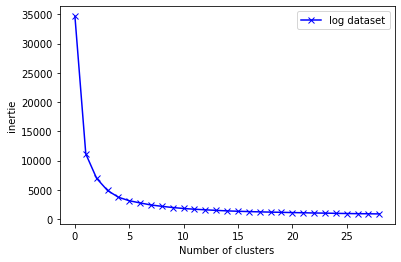

In [7]:
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(log_df)
    cost3.append(kmean.inertia_) 
    
plt.plot(cost3, 'bx-',label='log dataset')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('inertie')
plt.show()

<b> The ideal number of clusters for these dataset is about 3 clusters. </b>

In [8]:
# Try to find the number of clusters with the silhouette coefficient method
silhouette_scores2 = [] 
silhouette_scores3 = [] 

for n_cluster in range(2, 15):
    silhouette_scores2.append( 
        silhouette_score(df_out, KMeans(n_clusters = n_cluster).fit_predict(df_out))) 

for n_cluster in range(2, 15):
    silhouette_scores3.append( 
        silhouette_score(log_df, KMeans(n_clusters = n_cluster).fit_predict(log_df))) 

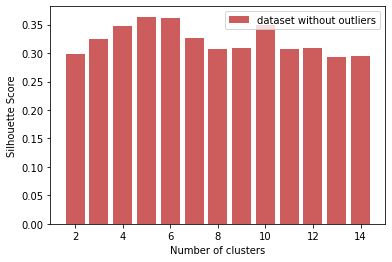

In [11]:
# Plotting a bar graph to compare the results 
k = np.arange(2,15)
plt.bar(k, silhouette_scores2,label= 'dataset without outliers',color = 'indianred') 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.legend()
plt.show() 

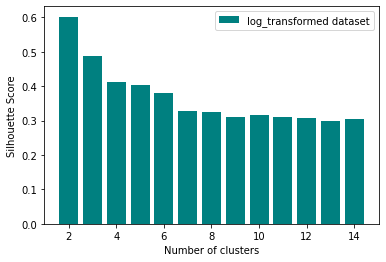

In [12]:
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores3,label= 'log_transformed dataset',color = 'teal') 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.legend()
plt.show() 

<b> It looks like for the dataset not log-transformed, 5 clusters is ideal based on the silhouette coefficient. For the log-transformed dataset, the results are a bit odd and show that the more we divide our dataset the worst it becomes. </b> 

## Kmean

In [13]:
# Apply Kmean on non-transformed dataset
km = KMeans(n_clusters=5,n_init=25, max_iter = 1000, random_state= 10)
km = km.fit(df_out)
predicted_km= km.predict(df_out)

df_out['cluster'] = km.labels_ +1 #Just set the first cluster = 1 instead of 0
df_out.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,0.039353,0.000787,0.091790,0.000000,0.091790,0.00000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546,2
C10002,0.293876,0.000083,0.000000,0.000000,0.000000,0.59124,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101,1
C10003,0.310798,0.000125,0.096307,0.096307,0.000000,0.00000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495,2
C10005,0.504284,0.000617,0.009867,0.009867,0.000000,0.00000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400,3
C10006,0.428658,0.000237,0.315788,0.000000,0.315788,0.00000,0.000158,0.000000,0.000138,0.000000,0.000000,0.001895,0.426330,0.331604,0.570156,0.00000,0.002842,5


In [14]:
# Apply Kmean on log-transformed dataset
km2 = KMeans(n_clusters=3,n_init=25, max_iter = 1000, random_state= 10)
km2 = km2.fit(log_df)
predicted_km2= km2.predict(log_df)

log_df['cluster'] = km2.labels_ +1 #Just set the first cluster = 1 instead of 0
log_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,3.711148,-0.015969,0.362733,0.000000,0.362733,0.000000,-0.142589,0.000000,-0.197750,0.000000,0.000000,0.055161,0.549721,0.422356,0.392978,0.000000,0.197750,1
C10002,8.071677,-0.005641,0.000000,0.000000,0.000000,0.519075,0.000000,0.000000,0.000000,-0.082045,0.082045,0.000000,0.523983,0.492369,0.412953,-0.089015,0.147063,2
C10003,7.822104,0.000000,0.409856,0.409856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.153139,0.549884,0.396455,0.396969,0.000000,0.153139,2
C10005,6.706513,0.000000,0.221327,0.221327,0.000000,0.000000,-0.198363,-0.198363,0.000000,0.000000,0.000000,0.000000,0.565979,0.520443,0.439081,0.000000,0.198363,2
C10006,7.500988,0.000000,0.427127,0.000000,0.427127,0.000000,-0.024069,0.000000,-0.031995,0.000000,0.000000,0.123438,0.444944,0.430028,0.462200,0.000000,0.147507,2


## Cluster's size

In [15]:
df_out.groupby('cluster').count().iloc[:,0]

cluster
1    1071
2    3087
3    2567
4    1493
5     407
Name: BALANCE, dtype: int64

In [16]:
log_df.groupby('cluster').count().iloc[:,0]

cluster
1    1458
2    4765
3    2402
Name: BALANCE, dtype: int64

## Visualization

In [17]:
# Scatter Plot
    # Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_out.iloc[:,:-1])
pca_df_out = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

    # Concatenate the clusters labels to the dataframe
pca_df_out = pd.concat([pca_df_out,pd.DataFrame({'cluster':df_out.reset_index().iloc[:,-1]})], axis = 1)
pca_df_out.head()

,pca1,pca2,cluster
0,-0.316841,-0.071213,2
1,0.323014,-0.135225,1
2,-0.200506,-0.203720,2
3,0.139756,-0.091308,3
4,0.334846,0.215780,5


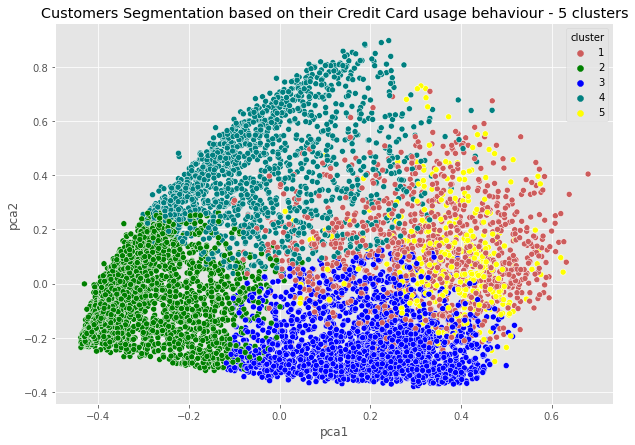

In [18]:
# Plot clusters based on their principal components - first iteration with 8 clusters
plt.figure(figsize=(10, 7)) 
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df_out, palette =['indianred','green','blue','teal','yellow'])
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour - 5 clusters")
plt.show()

<b> We can see clearly at least 3 clusters corresponding to the groups number 2,3 and 4. Maybe the clusters 1 and 5 are corresponding to the same individuals </b> We will verify that with a statistical test.

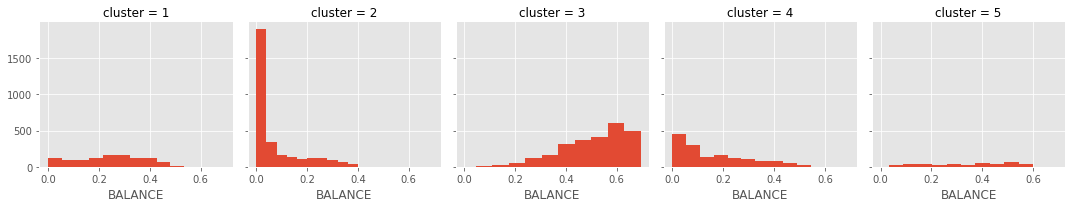

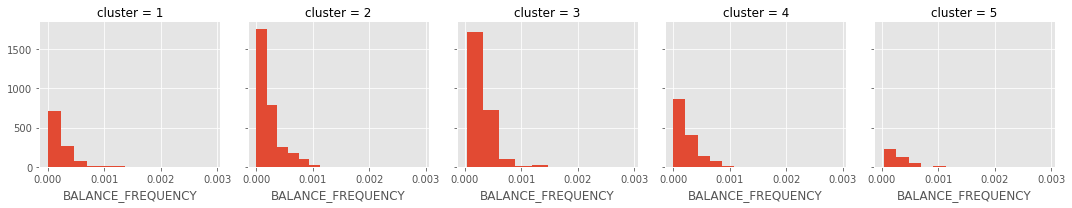

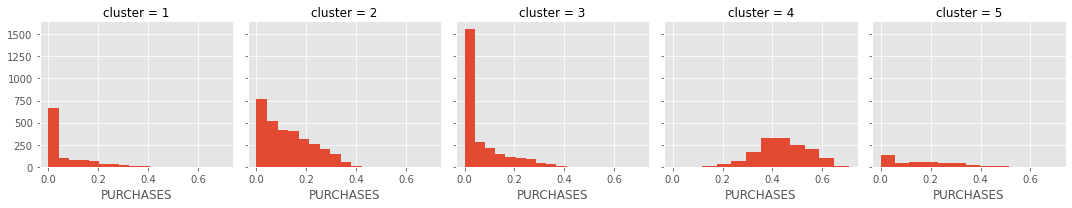

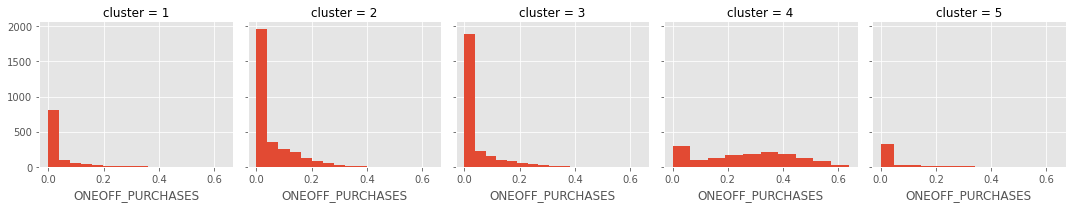

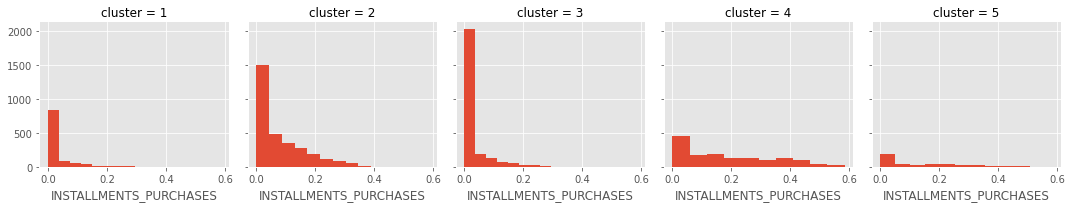

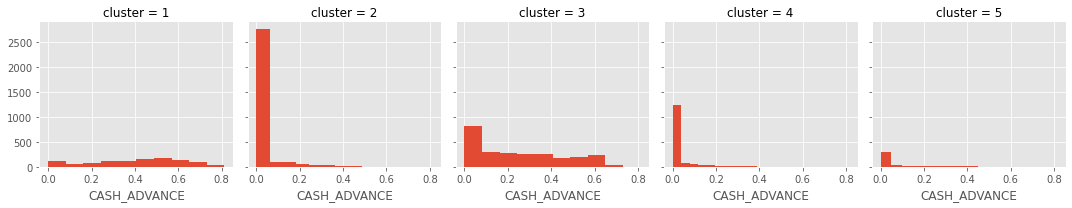

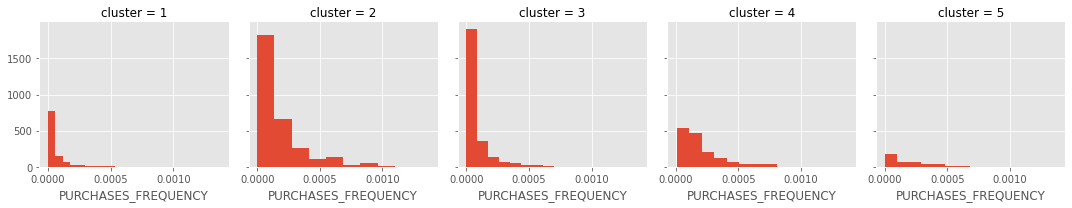

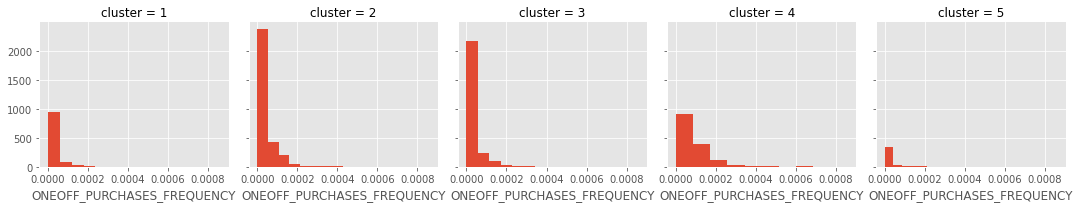

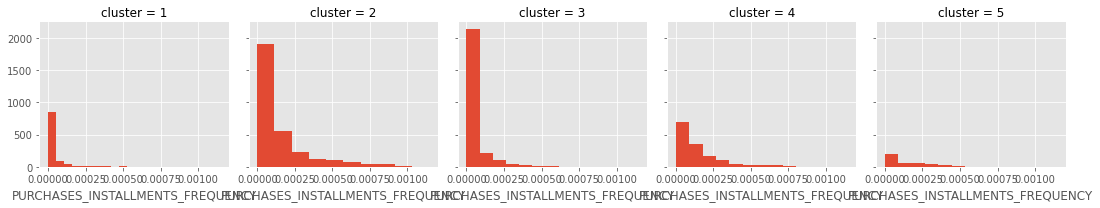

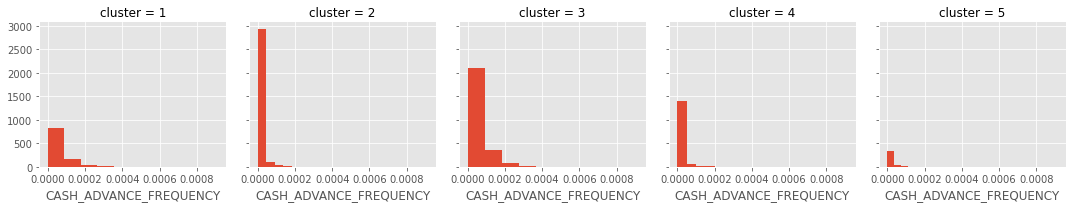

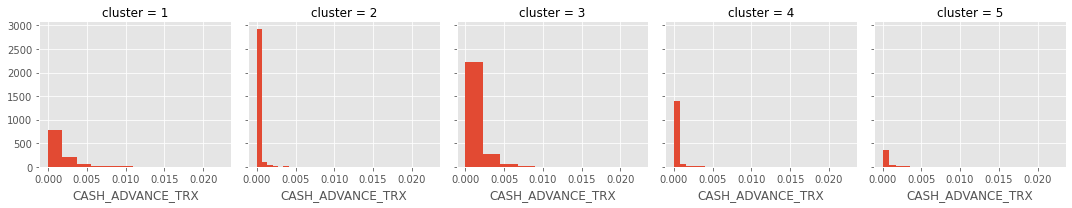

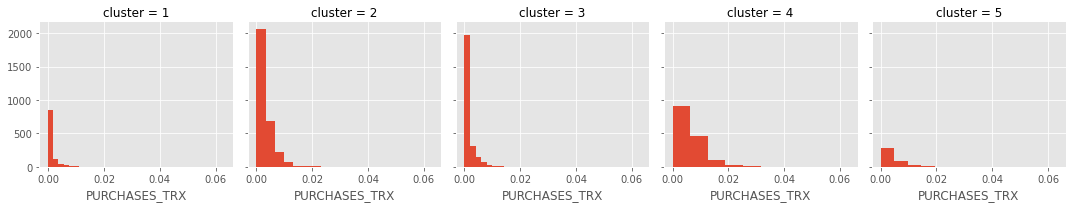

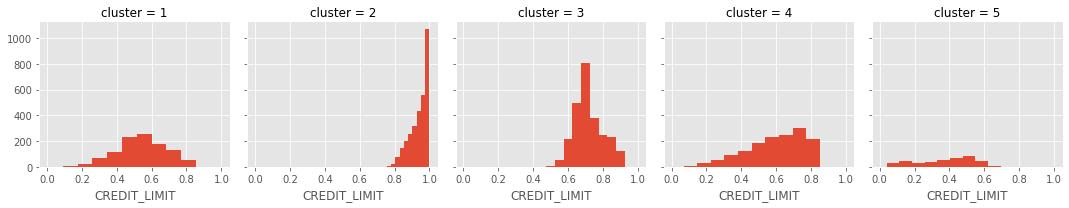

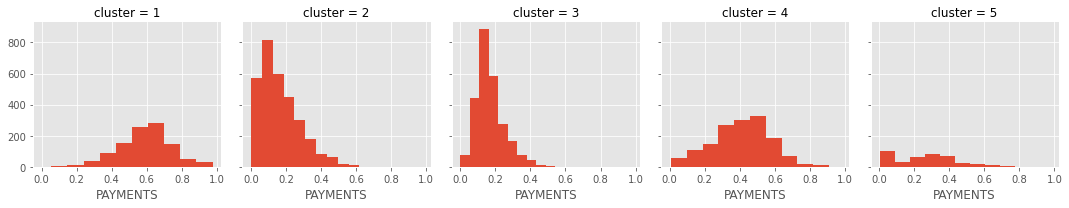

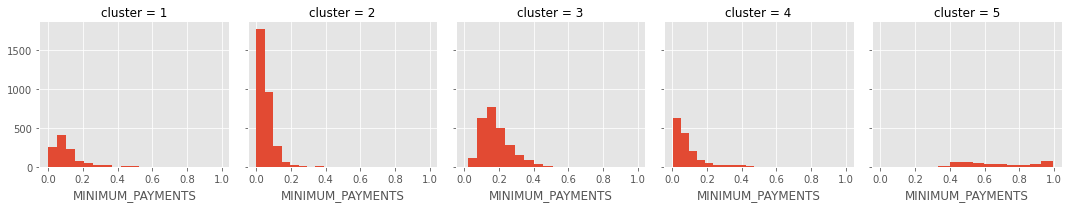

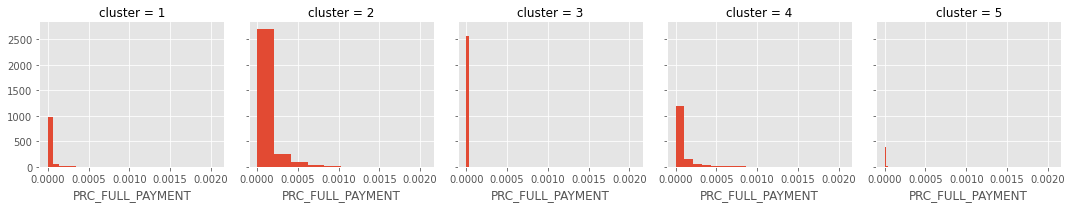

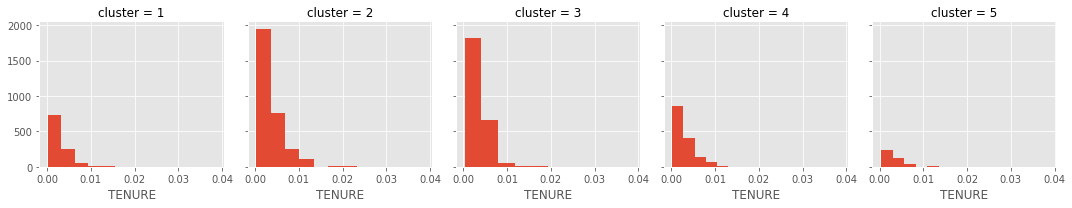

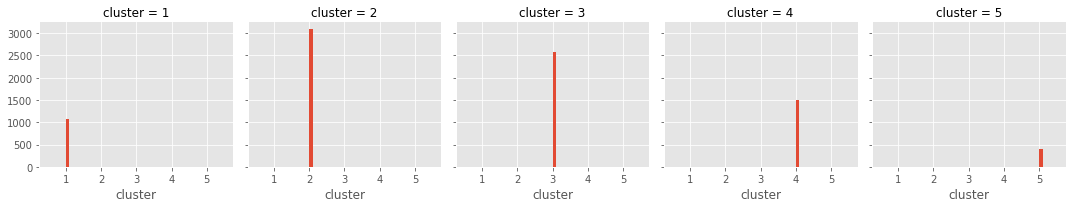

In [19]:
# Plot a grid with the distribution for all features of each clusters
for c in df_out:
    grid= sns.FacetGrid(df_out, col='cluster')
    grid.map(plt.hist, c)

<b> Key characteristics of each clusters </b>

- Cluster 1:
    - Lowest amount of purchases but high amount spent.
    - Usage of cash advance.
    
    
- Cluster 2: 
    - Low amount of money spent, mostly for installment payments.
    - Highest credit limit.
    
    
- Cluster 3: 
    - Highest amount of money available on the account and lowest amount of money spent.
    - High credit limit and usage of cash advance.
    
    
- Cluster 4: 
    - Highest amount of purchases made for all types (installments and one off).
    
    
- Cluster 5: 
    - Lowest money available on the account and lowest credit limit.
    - Low amount of purchases made but Highest minimum payments
    
<b> Based on this, it appears that the amount of purchases, the balance and payments are key parameters to segment the customers. </b>  Let's check which features are actually the most important.

In [20]:
# Same for the log-transformed dataset
    # Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(log_df.iloc[:,:-1])
pca_log_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])

    # Concatenate the clusters labels to the dataframe
pca_log_df = pd.concat([pca_log_df,pd.DataFrame({'cluster':log_df.reset_index().iloc[:,-1]})], axis = 1)
pca_log_df.head()

,pca1,pca2,cluster
0,2.541668,-0.004325,1
1,-1.857077,0.431410,2
2,-1.571571,-0.276698,2
3,-0.461477,-0.010581,2
4,-1.239507,-0.274958,2


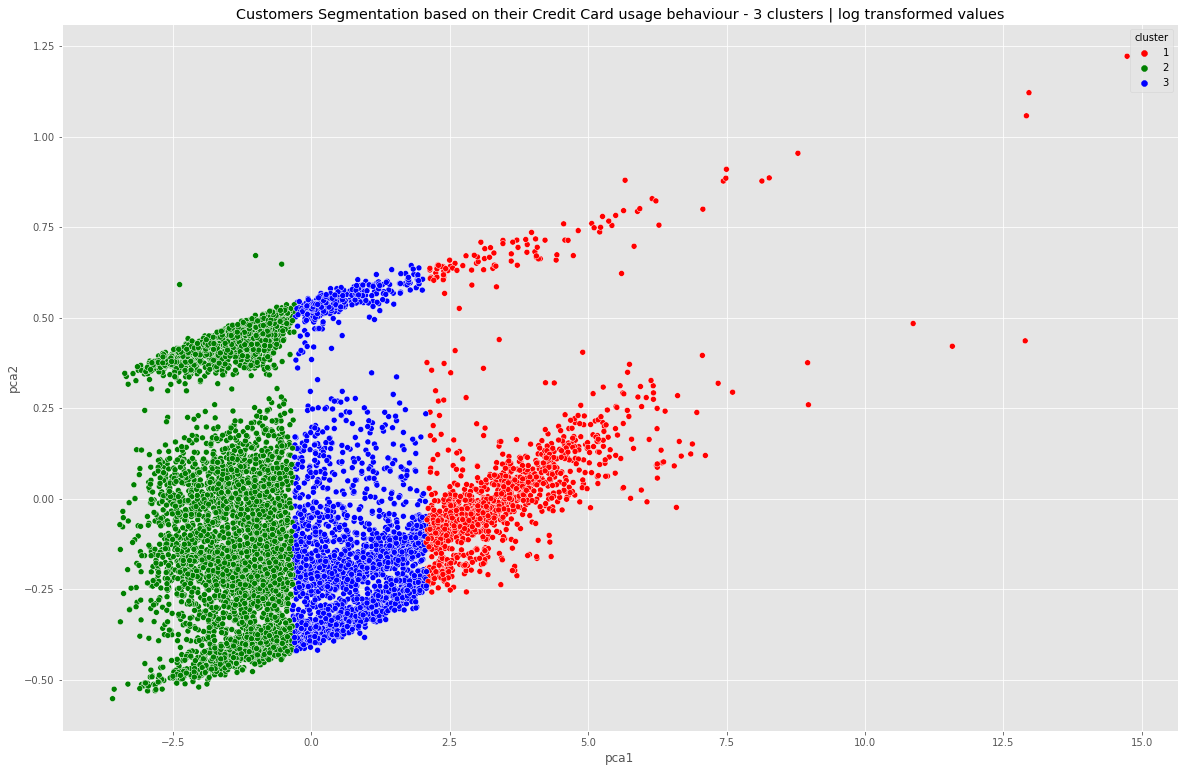

In [21]:
# Plot clusters based on their principal components
plt.figure(figsize=(20, 13)) 
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_log_df, palette =['red','green','blue'])
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour - 3 clusters | log transformed values")
plt.show()

<b> We can see that the segmentation on this dataset is not performing well: we would expect to see a cluster from the upper group and another one from the lower group, with potentially some sub-groups on the lower agregate. </b> For this reason we are not going further in this dataset. The log-transformation is not improving the segmentation.

## Features Importance

In [37]:
# Define the model
model = RandomForestClassifier()

# Define the parameters
X = df_out.iloc[:,:-1]
y = df_out.iloc[:,-1]

# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

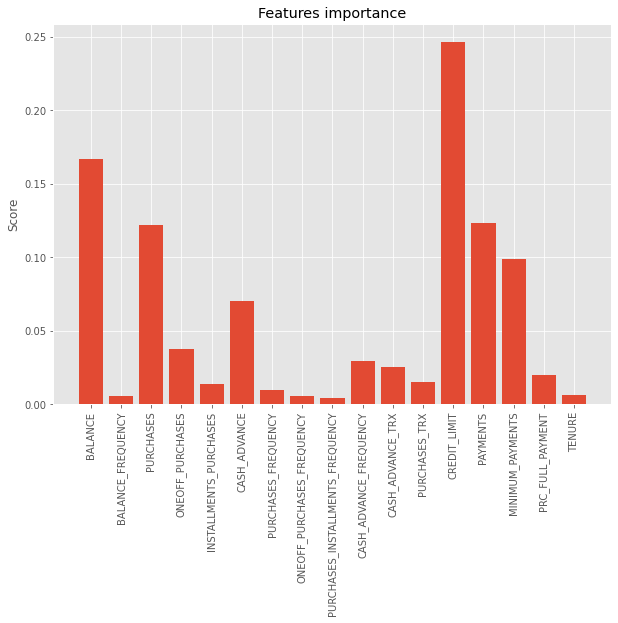

In [61]:
# Plot feature importance
labels = X.columns.to_list()
plt.figure(figsize=(10,7))
pyplot.bar([x for x in labels], importance)
plt.xticks(rotation=90)
plt.title('Features importance')
plt.ylabel('Score')
pyplot.show()

<b> It appears indeed that the parameters: Balance, Purchase and Payments are important for the customer segmentation. But the Credit limit is the most important and Cash advance is also relatively important </b>

## Cluster Analysis

### Centroids

In [23]:
# Extract centroid values for each clusters by features
cols = df_out.iloc[:,:-1].columns.to_list()
position = [df_out.iloc[:,:-1].columns.get_loc(c) for c in cols if c in df_out.iloc[:,:-1]]
test = []

for i in position:
    test.append(km.cluster_centers_[:,i])
    
tmp = pd.DataFrame(test, index = df.columns.to_list(),columns= np.arange(1,6)).T.reset_index().rename(columns= {'index':'cluster'})
tmp

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1,0.237756,0.000218,0.059023,0.033364,0.025665,0.407412,0.000052,0.000020,0.000035,0.000066,0.001593,0.001102,0.539147,0.589755,0.104352,2.756896e-05,0.002948
1,2,0.072728,0.000241,0.126194,0.049792,0.076510,0.022581,0.000176,0.000035,0.000143,0.000008,0.000120,0.002959,0.941652,0.163566,0.052230,8.147379e-05,0.003541
2,3,0.508860,0.000274,0.061776,0.035993,0.025805,0.246533,0.000068,0.000026,0.000045,0.000057,0.001138,0.001335,0.719451,0.170098,0.181316,5.434993e-07,0.003211
3,4,0.161155,0.000246,0.439908,0.258876,0.181206,0.026375,0.000204,0.000090,0.000149,0.000010,0.000179,0.006217,0.598965,0.408336,0.085280,7.308053e-05,0.003057
4,5,0.336390,0.000273,0.161157,0.036873,0.124673,0.058580,0.000170,0.000027,0.000150,0.000019,0.000431,0.003918,0.380949,0.257841,0.673093,4.331073e-06,0.003243


In [24]:
# Calculate the distance between the centroids and compile them into a matrix
matrix = pd.DataFrame(squareform(pdist(tmp.iloc[:,1:],metric='euclidean')),columns=tmp['cluster'],index=tmp['cluster'])
matrix

cluster,1,2,3,4,5
cluster,,,,,
1,0.000000,0.727370,0.560303,0.638797,0.781235
2,0.727370,0.000000,0.559786,0.582561,0.885025
3,0.560303,0.559786,0.000000,0.683155,0.669970
4,0.638797,0.582561,0.683155,0.000000,0.760024
5,0.781235,0.885025,0.669970,0.760024,0.000000


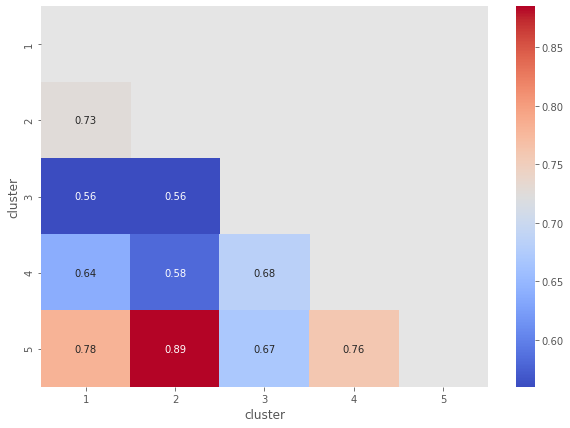

In [25]:
# Visualization distance between the clusters
mask = np.triu(np.ones_like(matrix, dtype=bool)) # Generate a mask for the upper triangle
plt.figure(figsize=(10,7))
sns.heatmap(matrix, cmap='coolwarm', mask=mask, annot = True)
plt.show()

<b> The distance between the centroids of each clusters seem to be pretty big, especially for the cluster 2 and 5 (which can be seen on the scatter plot) </b> On the scatter plot, it seems that the cluster 1 and 5 were likely not to be significatively different to each other. However, we can see that the distance between the centroids of the clusters is quite high (0.78). Does it mean that the 2 clusters are significatively different?

<b> We are now testing if the clusters are significatively different to each other with some statisticaly tests. </b>

### Comparisons Tests

The Mann-Whitney U test is a rank-based test that can be used to compare values for two groups. If we get a significant result it suggests that the values for the two groups are different. This test is equivalent to a two-sample Wilcoxon rank-sum test but for independant samples.
We don’t have to assume that our data is following the normal distribution and can decide whether the population distributions are identical. Now, the Mann–Whitney test does not address hypotheses about the medians of the groups.  Rather, the test addresses if it is likely that an observation in one group is greater than an observation in the other group.  In other words, it concerns whether one sample has stochastic dominance compared with the other.

We can use the Mann-Whitney U test when your outcome/dependent variable is either ordinal or continous but not normally distributed. Furthermore, this non-parametric test is used when you want to compare differences between two independent groups (e.g., such as an alternative to the two-sample t-test). 

- <b> Null hypothesis (H0) </b>: The two groups are sampled from populations with identical distributions.  Typically, the sampled populations exhibit stochastic equality.
- <b> Alternative hypothesis (H1) </b>: The two groups are sampled from populations with different distributions (see the previous section).  Most of the time, this means that one of the sampled populations (groups) displays stochastic dominance.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [96]:
# Function for carrying out the Wilcoxon–Mann–Whitney test 

def WMW_test(c1,c2): 
    results = []
    features = df_out.loc[:,('BALANCE','PURCHASES','PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE')].columns.to_list() # We test only for the most important features
    
    for c in df_out.loc[:,('BALANCE','PURCHASES','PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE')].columns:
        tmp1 = df_out[df_out.cluster == c1]
        tmp5 = df_out[df_out.cluster == c2]
        
        results.append((mannwhitneyu(tmp1[c], tmp5[c]))[1])
    
    return np.column_stack((features, results))

In [104]:
# Apply the function for the closest clusters (based on distance matrix)

In [97]:
WMW_test(1,5)

array([['BALANCE', '2.1783842387752534e-25'],
       ['PURCHASES', '3.1316993101178813e-49'],
       ['PAYMENTS', '1.6054452763897663e-137'],
       ['CREDIT_LIMIT', '6.1124032695647375e-56'],
       ['CASH_ADVANCE', '4.009583544540411e-135']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 1 & 5 are significatively different for all the important features </b> 

In [98]:
WMW_test(1,4)

array([['BALANCE', '3.7956743488107107e-47'],
       ['PURCHASES', '0.0'],
       ['PAYMENTS', '4.652594233383905e-146'],
       ['CREDIT_LIMIT', '1.7289201133482683e-27'],
       ['CASH_ADVANCE', '0.0']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 1 & 4 are significatively different for all the important features </b> 

In [99]:
WMW_test(1,3)

array([['BALANCE', '0.0'],
       ['PURCHASES', '0.07335050418588666'],
       ['PAYMENTS', '0.0'],
       ['CREDIT_LIMIT', '1.5278450541839628e-259'],
       ['CASH_ADVANCE', '1.7913373966872567e-84']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 1 & 3 are significatively different for most of the features except for PURCHASES. </b> 


In [100]:
WMW_test(2,4)

array([['BALANCE', '2.3360185765866505e-182'],
       ['PURCHASES', '0.0'],
       ['PAYMENTS', '0.0'],
       ['CREDIT_LIMIT', '0.0'],
       ['CASH_ADVANCE', '5.615233578044908e-05']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 2 & 4 are significatively different for all the important features </b> 

In [101]:
WMW_test(2,3)

array([['BALANCE', '0.0'],
       ['PURCHASES', '8.441727728150893e-198'],
       ['PAYMENTS', '3.571264338565979e-15'],
       ['CREDIT_LIMIT', '0.0'],
       ['CASH_ADVANCE', '0.0']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 2 & 3 are significatively different for all the important features </b> 

In [102]:
WMW_test(3,4)

array([['BALANCE', '0.0'],
       ['PURCHASES', '0.0'],
       ['PAYMENTS', '0.0'],
       ['CREDIT_LIMIT', '5.950253879334523e-110'],
       ['CASH_ADVANCE', '0.0']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 3 & 4 are significatively different for all the important features </b> 

In [103]:
WMW_test(4,5)

array([['BALANCE', '1.6635409150835755e-76'],
       ['PURCHASES', '1.9733987335396613e-161'],
       ['PAYMENTS', '7.431116689375694e-50'],
       ['CREDIT_LIMIT', '4.92818403366608e-92'],
       ['CASH_ADVANCE', '1.6198708071606516e-18']], dtype='<U32')

<b> The Mann-Whitney U test shows that the cluster 4 & 5 are significatively different for all the important features </b> 

<div class='alert alert-block alert-info'> The 5 clusters found with Kmean appear to be statistically significant so they can be used for the customer segmentation.
</div>